# Supervised Learning
## Disease Classification based on symptoms 
### (Covid-19, Flu, Cold, Allergy)

Professor: 
* Luís Paulo Reis

Group members:
* Eduardo Brito, up201806271
* Paulo Ribeiro, up201806505
* Rita Silva, up201806527

### Specification

**Covid-19**, the common **Cold**, **Seasonal Allergies** and the **Flu** have many similar signs and
symptoms. These common problems are often mistaken for Covid-19 and this project will help
provide a distinction between them.

Based on a data set with information about some patients’ diagnosis and the experienced
symptoms: 

> *Our goal is to associate them and understand their relationship in order to help diagnose
new patients.*

Hereupon, we identify this as **a single label multiclass classification problem** with 21 attributes:

- 20  distinct  symptoms,  with  a  value  of  1  if  the  patient  suffers  from  it  and  0  otherwise
- 1 diagnose with 4 possible outcomes (Covid-19, Cold, Allergies and Flu).

### Tools & Resources

* Data Preprocessing:
    * pandas
    * numpy
* Data Visualization:
    * seaborn
    * matplotlib
* ML Algorithms:
    * scikitlearn

### Data Analysis & Preprocessing

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os.path

In [103]:
# Load csv data
data = pd.read_csv("../data/large_data.csv")

In [104]:
# Print head values and summary statistics
print(data.head())
print()
print(data.describe())
print()

   COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0      0             0          1            0           1            0   
1      0             0          1            0           0            0   
2      0             1          1            1           0            0   
3      0             0          0            1           1            0   
4      0             0          1            0           1            0   

   FEVER  NAUSEA  VOMITING  DIARRHEA  ...  DIFFICULTY_BREATHING  \
0      0       0         0         0  ...                     0   
1      0       0         0         0  ...                     0   
2      0       0         0         0  ...                     0   
3      0       0         0         0  ...                     0   
4      0       0         0         0  ...                     0   

   LOSS_OF_TASTE  LOSS_OF_SMELL  ITCHY_NOSE  ITCHY_EYES  ITCHY_MOUTH  \
0              1              0           1           0            0   
1 

In [105]:
# Get separate list of symptoms and diseases
columns = data.columns
symptoms = list(columns)
print("Symptoms: {}".format(symptoms))
print()
symptoms.remove("TYPE")
diseases = list(data["TYPE"].unique())
print("Diseases: {}".format(diseases))

Symptoms: ['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE', 'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE']

Diseases: ['ALLERGY', 'COLD', 'COVID', 'FLU']


In [106]:
# Check for columns with not allowed values
print("Checking for columns with not allowed values:")
found = False
for i in symptoms:
    values = data[i].unique()
    # Values different from 0 and 1
    if not np.array_equiv(np.sort(values), np.array([0,1])):
        found = True
        print("Column {} has different values: {}".format(i, values))

if not found: print("Nothing Found...")

Checking for columns with not allowed values:
Nothing Found...


**Based on the summary, our problem presents some properties:**
* Nominal and Discrete binary attributes
* Dimensionality = 21 attributes
* Size = 44k records
* Type = Data Matrix
* No meaningful outliers
* No missing or duplicate Data
* Similarity of around 55% (Hamming Distance)

Ploting total number of rows per disease (total_diseases.png):

      TYPE  count
0      FLU  25000
1  ALLERGY  16381
2    COVID   2048
3     COLD   1024


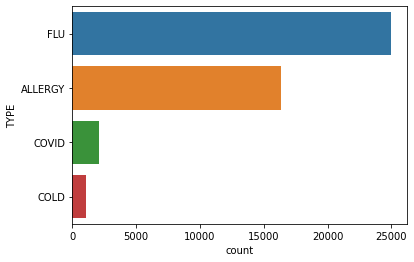

In [107]:
# Count total number of rows per disease
print("Ploting total number of rows per disease (total_diseases.png):")
print()
count_disease = pd.DataFrame(data["TYPE"]).value_counts().rename_axis('TYPE').reset_index(name='count')
print(count_disease)
plot_st = sb.barplot(data=count_disease, x="count", y="TYPE")
plt.show()

Ploting total number of records per symptom (sum_total.png):



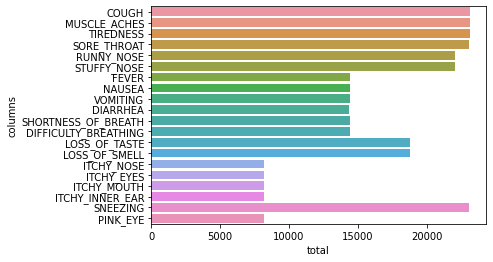

In [108]:
# Count total number of records per symptom
print("Ploting total number of records per symptom (sum_total.png):")
print()
sum_columns = { "columns" : list(columns.drop("TYPE")), "total" : [data[c].sum() for c in columns if c != 'TYPE']}
sum_columns = pd.DataFrame(sum_columns)
plot_st = sb.barplot(data=sum_columns, x="total", y="columns")
plt.show()

As we can see, there is some counting similarity between symptoms which are indeed correlated in the real world. 

Based on that, we decided to order our columns to better visualize correlated symptoms:

In [109]:
# Order columns and similar symptoms
data = data[[
    'COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT','SNEEZING', 
    'RUNNY_NOSE', 'STUFFY_NOSE', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 
    'FEVER',
    'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 
    'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE', 
    'TYPE']]

columns = data.columns
symptoms = list(columns)
symptoms.remove("TYPE")
diseases = list(data["TYPE"].unique())

Ploting total number of records per symptom (sum_total.png):



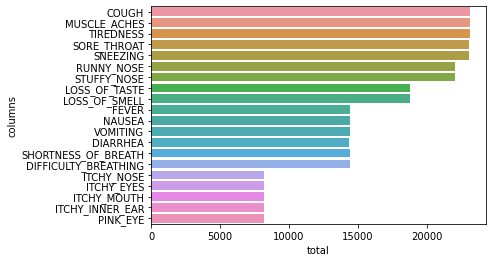

In [110]:
# Count total number of records per symptom
print("Ploting total number of records per symptom (sum_total.png):")
print()
sum_columns = { "columns" : list(columns.drop("TYPE")), "total" : [data[c].sum() for c in columns if c != 'TYPE']}
sum_columns = pd.DataFrame(sum_columns)
plot_st = sb.barplot(data=sum_columns, x="total", y="columns")
plt.show()

Ploting symptoms correlation factor (correlation.png):



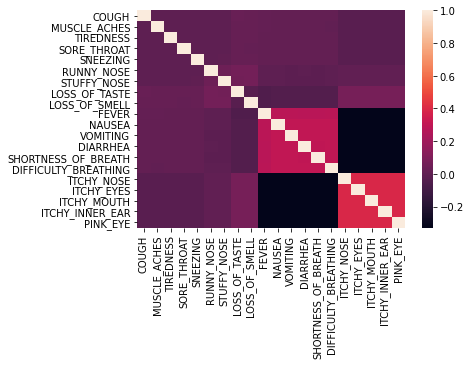

In [111]:
# Get symptoms correlation factor
print("Ploting symptoms correlation factor (correlation.png):")
print()
correlation = data.drop("TYPE", axis=1)
correlation = correlation.corr(method="spearman", min_periods=44000)
plot_s = sb.heatmap(correlation, annot=False)
plt.show()

There is also another measure we considered visualizing: 
* The number of symptoms registered per person.

As will be shown in the plot, every disease has a similar distribution of the number of symptoms registered per person, being that distribution between minimum 1 and maximum 14 symptoms. This, we concluded, may not say much, because the mean values are very close to each other.

Ploting number of symptoms registered per disease (total_symptoms.png):



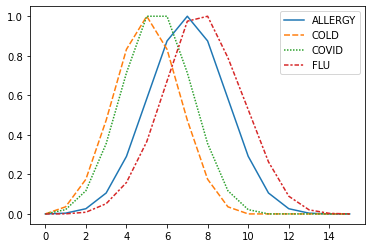

In [112]:
# Count the number of symptoms registered per disease
print("Ploting number of symptoms registered per disease (total_symptoms.png):")
print()
total_symptoms = data.copy()
total_symptoms["TOTAL"] = total_symptoms.sum(axis=1)
total_symptoms = total_symptoms[["TYPE", "TOTAL"]]

ts = pd.DataFrame(0, index=np.arange(16), columns=diseases)

# Normalize (min-max) the values
for d in diseases:
    n = total_symptoms.loc[total_symptoms["TYPE"] == d]
    occ = n["TOTAL"].value_counts()
    mx = float(occ.max())
    mn = float(occ.min())

    ddt = pd.DataFrame(occ).sort_index(0)

    for i,r in ddt.iterrows():
        old = r["TOTAL"]
        new = float(old - mn) / float(mx-mn)
        ts.loc[i,d] = new

plot_ts = sb.lineplot(data=ts)
plt.show()

Then, we decided to measure the percentage of people with a given symptom for every disease. The next plot, on the other hand, gives us now a clear perception of the correlation between some symptoms as well as the fact that some groups of symptoms only occur in distinct diseases or patterns.

Ploting percentage of occurrence of every symptom per desease (pair_symptoms.png):



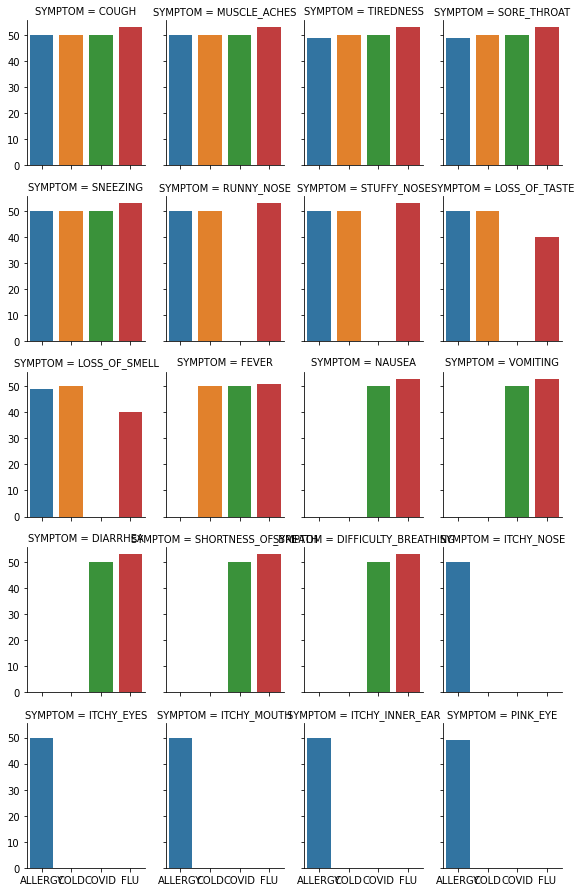

In [113]:
# Get the percentage of occurrence of every symptom per desease
print("Ploting percentage of occurrence of every symptom per desease (pair_symptoms.png):")
print()
frequency_symptoms = []
total_diseases = data[["TYPE"]]
total_diseases = pd.DataFrame([total_diseases["TYPE"].value_counts()]).reset_index().drop("index", axis=1)

for s in symptoms:
    frequency_symptoms.append([s] + [0 for i in range(len(diseases))])

for i,r in data.iterrows():
    d = r["TYPE"]
    for i in range(len(symptoms)):
        if r[symptoms[i]] == 1:
            frequency_symptoms[i][diseases.index(d) + 1] += 1

for fq in frequency_symptoms:
    for d in range(len(diseases)):
        total = total_diseases[diseases[d]][0]
        fq[d+1] = int(fq[d+1] / total * 100)

frequency_symptoms = pd.DataFrame(frequency_symptoms, columns=(["SYMPTOM"] + diseases))
plot_ps = sb.catplot(col="SYMPTOM", col_wrap=4,
                data=frequency_symptoms,
                kind="bar", height=2.5, aspect=.8)
plt.show()

We also applied the *SelectKBest* scikitlearn algorithm with the *chi2* score funtion (better suited for binary data) to find our best features in relation to the solution column. 

This plot could also confirm the assumptions made in the previous analysis, where we found highly correlated symtoms that could very quickly be used to infer some types of diseases.

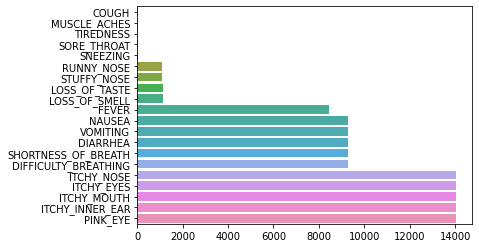

In [114]:
# Univariate Selection to find the best scoring features
# https://en.wikipedia.org/wiki/Dimensionality_reduction
from sklearn.feature_selection import SelectKBest, chi2

fit = SelectKBest(chi2).fit(data[symptoms], y=data['TYPE'])
plot_st = sb.barplot(x=fit.scores_, y=symptoms, orient="h")
plt.show()

### Data Preprocessing

After visualizing the data and making some clear points on the patterns observed by similar symptoms, we decided to apply a set of actions to preprocess our data:

#### 1. Encode the *class* column 

In [115]:
from sklearn.preprocessing import LabelEncoder

# Rename Column Type to class
data = data.rename(columns={'TYPE' : 'class'})

# Encode the classes names to representative numbers 
print("Encoding the classes names to representative numbers:")
label_encoder = LabelEncoder()                   
data['class']= label_encoder.fit_transform(data['class'])

# Save encoding values for future reference
keys = label_encoder.classes_
values = label_encoder.transform(keys)
dictionary = dict(zip(keys, values))
print(dictionary)

Encoding the classes names to representative numbers:
{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}


#### 2. Aggregate similar symptoms into new columns
These new columns will be the result of a **Logical OR** applied to the aggregated columns.
We decided, based on the previous plots, to aggregate the *NAUSEA* & *VOMITING* related symptoms as well as all the *ITCHY* ones into new columns. 

This action helped us reducing the total number of features from 21 to 13.

In [116]:
# Aggregate similar symptoms
# New symptom VOMIT = [LOGICAL OR] 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'
data['VOMIT'] = data['NAUSEA'] + data['VOMITING'] + data['DIARRHEA'] + data['SHORTNESS_OF_BREATH'] + data['DIFFICULTY_BREATHING']
data['VOMIT'] = data['VOMIT'].apply(lambda x: int(bool(x)))
data = data.drop(['NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'], axis=1)


# New symptom ITCHY = [LOGICAL OR] 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'
data['ITCHY'] = data['ITCHY_NOSE'] + data['ITCHY_EYES'] + data['ITCHY_MOUTH'] + data['ITCHY_INNER_EAR'] + data['PINK_EYE']
data['ITCHY'] = data['ITCHY'].apply(lambda x: int(bool(x)))
data = data.drop(['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'], axis=1)

After all the data preprocessing, now we are good to go on start splitting our data between two sets:
* 80% for training
* 20% for testing

In [117]:
from sklearn.model_selection import train_test_split

labels = data.pop('class')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=5)

### Algorithms
Let's start the application of different ML Algorithms to train and create a predictive model for our data. The Algorithms applied will be:
* Decision Tree
* Random Forest
* SVM (Support-Vector Machine)
* K-NN (K-Nearest Neighbour)
* Neural Networks

As tuning approaches we decided to use the scikitlearn functions *StratifiedKFold* and *GridSearchCV* on our training process. The first one is to avoid overfitting and also to balance our database (not all classes have the same number of records) during the fitting process. The last one is used to test different parameters for the classifiers and choosing the best ones. 

In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
import joblib

#### Decision Tree
We applied the Decision Tree Classifier, before, with a set of different parameters which can be tested replacing the parameter grid in the code with this one:
```python
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'], 
                  'max_depth': [1,2,5,10],
                  'max_features': [5,8,10,12]}
```

DECISION TREE CLASSIFIER:

Time Elapsed: 0.717260151000005 seconds
Best score: 0.9327088445192594
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 12, 'splitter': 'best'}
Accuracy: 0.9307164548419751

Confusion matrix:

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3255   83    0    0]
 [  34  177    0    0]
 [   0   10  400    0]
 [  11   87  391 4443]]

Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3338
           1       0.50      0.84      0.62       211
           2       0.51      0.98      0.67       410
           3       1.00      0.90      0.95      4932

    accuracy                           0.93      8891
   macro avg       0.75      0.92      0.80      8891
weighted avg       0.96      0.93      0.94      8891



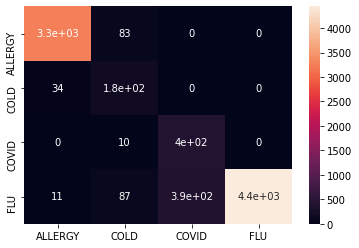

['dt_model.sav']

In [119]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'], 
                  'max_depth': [5],
                  'max_features': [12]}

cross_validation = StratifiedKFold(n_splits=10,  shuffle=True)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

print("DECISION TREE CLASSIFIER:")
print()

start = time.process_time()
grid_search.fit(X_train, y_train)
print('Time Elapsed: {} seconds'.format(time.process_time() - start))

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion matrix:")
print()
print(dictionary)
cfmx = confusion_matrix(y_test, y_pred)
print(cfmx)
print()
print("Report: ")
print(classification_report(y_test, y_pred))

plot_cfmx = sb.heatmap(cfmx, xticklabels=diseases, yticklabels=diseases, annot=True)
plt.show()

filename = 'dt_model.sav'
joblib.dump(grid_search, filename)

![](./images/decision-tree.png)

#### Random Forest
We also tried the Random Forest Classifier. 
As this algorithm uses a set of Decision Trees this means that results may be quite similar, except for the processing time. We also tested it before, with a set of different parameters which can be tested replacing the parameter grid in the code with this one:
```python
parameter_grid = {'n_estimators': [2, 5, 10],
                'criterion': ['gini', 'entropy'],
                'bootstrap' : ["True", "False"],
                'max_depth' : [1,2,5],
                'max_features': [8,10,12],
                'n_jobs' : [5]}
```


RANDOM FOREST CLASSIFIER:

Time Elapsed: 1.5432124000000158 seconds
Best score: 0.9333840131453908
Best parameters: {'bootstrap': 'False', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 12, 'n_estimators': 5, 'n_jobs': 5}
Accuracy: 0.9300416151164098

Confusion matrix:

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3277   61    0    0]
 [  62  149    0    0]
 [   0   10  400    0]
 [  28   70  391 4443]]

Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3338
           1       0.51      0.71      0.59       211
           2       0.51      0.98      0.67       410
           3       1.00      0.90      0.95      4932

    accuracy                           0.93      8891
   macro avg       0.75      0.89      0.80      8891
weighted avg       0.96      0.93      0.94      8891



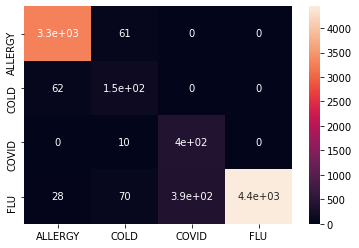

['rf_model.sav']

In [120]:
from sklearn.ensemble import RandomForestClassifier

parameter_grid = {'n_estimators': [5],
                'criterion': ['gini', 'entropy'],
                'bootstrap' : ["True", "False"],
                'max_depth' : [5],
                'max_features': [12],
                'n_jobs' : [5]
}

random_forest_classifier = RandomForestClassifier()

cross_validation = StratifiedKFold(n_splits=10,  shuffle=True)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

print("RANDOM FOREST CLASSIFIER:")
print()

start = time.process_time()
grid_search.fit(X_train, y_train)
print('Time Elapsed: {} seconds'.format(time.process_time() - start))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion matrix:")
print()
print(dictionary)
cfmx = confusion_matrix(y_test, y_pred)
print(cfmx)
print()
print("Report: ")
print(classification_report(y_test, y_pred))
plot_cfmx = sb.heatmap(cfmx, xticklabels=diseases, yticklabels=diseases, annot=True)
plt.show()

filename = 'rf_model.sav'
joblib.dump(grid_search, filename)

#### Support Vector Machine
SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data. We also tested it with different values for the *kernel* parameter and let the GridSearch to choose the best.


SVM CLASSIFIER:

Time Elapsed: 69.14281710700004 seconds
Best score: 0.9311343180781065
Best parameters: {'kernel': 'linear'}
Accuracy: 0.9291418288156563

Confusion matrix:

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3278   60    0    0]
 [  57  153    1    0]
 [   3    7  191  209]
 [  29   68  196 4639]]

Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3338
           1       0.53      0.73      0.61       211
           2       0.49      0.47      0.48       410
           3       0.96      0.94      0.95      4932

    accuracy                           0.93      8891
   macro avg       0.74      0.78      0.75      8891
weighted avg       0.93      0.93      0.93      8891



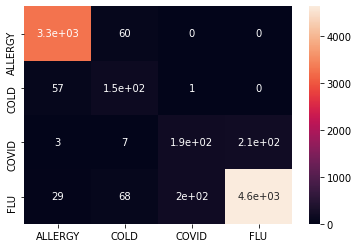

['svm_model.sav']

In [121]:

from sklearn.svm import SVC

classifierSVC = SVC()

svc_parameter_grid = {'kernel': ['linear', 'rbf']}

svc_cross_validation = StratifiedKFold(n_splits=10,  shuffle=True)

grid_search = GridSearchCV(classifierSVC,
                           param_grid=svc_parameter_grid,
                           cv=svc_cross_validation)

print("SVM CLASSIFIER:")
print()
start = time.process_time()
grid_search.fit(X_train, y_train)
print('Time Elapsed: {} seconds'.format(time.process_time() - start))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion matrix:")
print()
print(dictionary)
cfmx = confusion_matrix(y_test, y_pred)
print(cfmx)
print()
print("Report: ")
print(classification_report(y_test, y_pred))
plot_cfmx = sb.heatmap(cfmx, xticklabels=diseases, yticklabels=diseases, annot=True)
plt.show()

filename = 'svm_model.sav'
joblib.dump(grid_search, filename)

#### KNeighbors
We also tested this one before, with a set of different parameters which can be tested replacing the parameter grid in the code with this one:
```python
knn_parameter_grid = {'n_neighbors': [3,5,10],
                'weights': ['uniform’, ‘distance’],
                'algorithm': [‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’],
                'n_jobs' : [5]
```


K-NN CLASSIFIER:

Time Elapsed: 90.27094417800004 seconds
Best score: 0.9221920970168298
Best parameters: {'algorithm': 'brute', 'n_jobs': 5, 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9235181644359465

Confusion matrix:

{'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3304   15    3   16]
 [  81   24    7   99]
 [   2    2  246  160]
 [  32   12  251 4637]]

Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3338
           1       0.45      0.11      0.18       211
           2       0.49      0.60      0.54       410
           3       0.94      0.94      0.94      4932

    accuracy                           0.92      8891
   macro avg       0.71      0.66      0.66      8891
weighted avg       0.92      0.92      0.92      8891



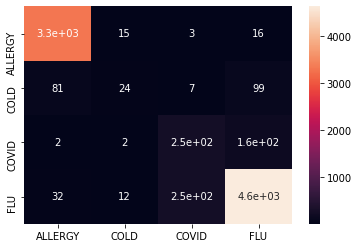

['knn_model.sav']

In [122]:
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier()

knn_parameter_grid = {
                'n_neighbors': [5],
                'weights': ['uniform'],
                'algorithm': ['brute'],
                'n_jobs' : [5]
}

knn_cross_validation = StratifiedKFold(n_splits=10,  shuffle=True)

grid_search = GridSearchCV(classifierKNN,
                           param_grid=knn_parameter_grid,
                           cv=knn_cross_validation)

print("K-NN CLASSIFIER:")
print()

start = time.process_time()
grid_search.fit(X_train, y_train)
print('Time Elapsed: {} seconds'.format(time.process_time() - start))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion matrix:")
print()
print(dictionary)
cfmx = confusion_matrix(y_test, y_pred)
print(cfmx)
print()
print("Report: ")
print(classification_report(y_test, y_pred))
plot_cfmx = sb.heatmap(cfmx, xticklabels=diseases, yticklabels=diseases, annot=True)
plt.show()

filename = 'knn_model.sav'
joblib.dump(grid_search, filename)

#### Neural Networks
Finally, we also applied NN before, with a set of different parameters which can be tested replacing the parameter grid in the code with this one:
```python
parameter_grid_nn = {
                'activation': ['relu','tanh'],
                'solver': ['sgd', 'adam'],
                'hidden_layer_sizes' : [(12,12,12,12), (8,8,8,8,8), (3,32,6,32), (3,5,12,32)]}
```


NEURAL NETWORK CLASSIFIER:

Iteration 1, loss = 0.53481968
Iteration 2, loss = 0.25863826
Iteration 3, loss = 0.23001506
Iteration 4, loss = 0.21853622
Iteration 5, loss = 0.21429503
Iteration 6, loss = 0.21227985
Iteration 7, loss = 0.20964786
Iteration 8, loss = 0.20791809
Iteration 9, loss = 0.20173153
Iteration 10, loss = 0.18024419
Iteration 11, loss = 0.13947117
Iteration 12, loss = 0.11903975
Iteration 13, loss = 0.11239772
Iteration 14, loss = 0.11019704
Iteration 15, loss = 0.10845638
Iteration 16, loss = 0.10786393
Iteration 17, loss = 0.10744924
Iteration 18, loss = 0.10745244
Iteration 19, loss = 0.10675860
Iteration 20, loss = 0.10808170
Iteration 21, loss = 0.10631547
Iteration 22, loss = 0.10628392
Iteration 23, loss = 0.10530335
Iteration 24, loss = 0.10494455
Iteration 25, loss = 0.10523278
Iteration 26, loss = 0.10619938
Iteration 27, loss = 0.10466432
Iteration 28, loss = 0.10677930
Iteration 29, loss = 0.10408349
Iteration 30, loss = 0.10438983
Iteration 31, loss = 

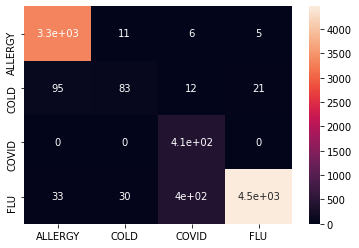

['nn_model.sav']

In [123]:

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

neural_network_classifier = MLPClassifier()

parameter_grid_nn = {
                'activation': ['tanh'],
                'solver': ['adam'],
                'hidden_layer_sizes' : [(3,5,8,13,21,34)],
                'verbose': [True]}

cross_validation_nn = StratifiedKFold(n_splits=10,  shuffle=True)

grid_search = GridSearchCV(neural_network_classifier,
                           param_grid=parameter_grid_nn,
                           cv=cross_validation_nn)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("NEURAL NETWORK CLASSIFIER:")
print()

start = time.process_time()
grid_search.fit(X_train, y_train)
print('Time Elapsed: {} seconds'.format(time.process_time() - start))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

y_pred = grid_search.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print()
print("Confusion matrix:")
print()
print(dictionary)
cfmx = confusion_matrix(y_test, y_pred)
print(cfmx)
print()
print("Report: ")
print(classification_report(y_test, y_pred))
plot_cfmx = sb.heatmap(cfmx, xticklabels=diseases, yticklabels=diseases, annot=True)
plt.show()

filename = 'nn_model.sav'
joblib.dump(grid_search, filename)

### Algorithms Comparison

#### Time Spent (Training)

<img src="./images/time.png" width="50%">

#### Evaluation Metrics

<img src="./images/metrics.png" width="50%">

By analysing these graphics, we conclude that the most efficient algorithm is the DECISION TREE, since it achieves the best results in the shortest time. This might be due to the nature of our problem, which can be represented by a simple set of Yes/No decisions, easily represented by a tree.

### Bonus

These models can be tested on a single independent test instance.
Provide your input on the following questions and see the diagnosis from our different algorithms.

In [132]:
print(symptoms)

def yes_or_no(question):
    while "the answer is invalid":
        reply = str(input(question + ' (y/n): ')).lower().strip()
        if reply[0] == 'y':
            return 1
        if reply[0] == 'n':
            return 0
test_input = []
for c in symptoms:
    answer = yes_or_no("Do you have {}?".format(c))
    test_input.append(answer)

test_df = pd.DataFrame(data=[test_input], columns=symptoms)

key_list = list(dictionary.keys())
val_list = list(dictionary.values())

test_df['VOMIT'] = test_df['NAUSEA'] + test_df['VOMITING'] + test_df['DIARRHEA'] + test_df['SHORTNESS_OF_BREATH'] + test_df['DIFFICULTY_BREATHING']
test_df['VOMIT'] = test_df['VOMIT'].apply(lambda x: int(bool(x)))
test_df = test_df.drop(['NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING'], axis=1)
test_df['ITCHY'] = test_df['ITCHY_NOSE'] + test_df['ITCHY_EYES'] + test_df['ITCHY_MOUTH'] + test_df['ITCHY_INNER_EAR'] + test_df['PINK_EYE']
test_df['ITCHY'] = test_df['ITCHY'].apply(lambda x: int(bool(x)))
test_df = test_df.drop(['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE'], axis=1)

print()
dt_model = joblib.load('dt_model.sav')
prediction = dt_model.predict(test_df)
print("DT says you have", key_list[val_list.index(prediction)])

rf_model = joblib.load('rf_model.sav')
prediction = rf_model.predict(test_df)
print("RF says you have", key_list[val_list.index(prediction)])

svm_model = joblib.load('svm_model.sav')
prediction = svm_model.predict(test_df)
print("SVM says you have", key_list[val_list.index(prediction)])

knn_model = joblib.load('knn_model.sav')
prediction = knn_model.predict(test_df)
print("KNN says you have", key_list[val_list.index(prediction)])

nn_model = joblib.load('nn_model.sav')
prediction = nn_model.predict(test_df)
print("NN says you have", key_list[val_list.index(prediction)])

['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'SNEEZING', 'RUNNY_NOSE', 'STUFFY_NOSE', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']


Do you have COUGH? (y/n):  n
Do you have MUSCLE_ACHES? (y/n):  n
Do you have TIREDNESS? (y/n):  n
Do you have SORE_THROAT? (y/n):  n
Do you have SNEEZING? (y/n):  n
Do you have RUNNY_NOSE? (y/n):  n
Do you have STUFFY_NOSE? (y/n):  n
Do you have LOSS_OF_TASTE? (y/n):  n
Do you have LOSS_OF_SMELL? (y/n):  n
Do you have FEVER? (y/n):  n
Do you have NAUSEA? (y/n):  y
Do you have VOMITING? (y/n):  y
Do you have DIARRHEA? (y/n):  y
Do you have SHORTNESS_OF_BREATH? (y/n):  y
Do you have DIFFICULTY_BREATHING? (y/n):  y
Do you have ITCHY_NOSE? (y/n):  n
Do you have ITCHY_EYES? (y/n):  n
Do you have ITCHY_MOUTH? (y/n):  n
Do you have ITCHY_INNER_EAR? (y/n):  n
Do you have PINK_EYE? (y/n):  n



DT says you have COVID
RF says you have COVID
SVM says you have COVID
KNN says you have COVID
NN says you have FLU
